<a href="https://colab.research.google.com/github/felipemorera98/DataSetIABO22/blob/main/Parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import svm
import matplotlib.pyplot as plt

In [126]:
from numpy.ma.core import size
iris = load_iris()
X= iris.data[:,1:3]
y= iris.target
#print(X)

In [133]:
clasificador=svm.LinearSVC(random_state=5,C=100)
clasificador.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(C=100, random_state=5)

In [128]:
testSet = [[3.3,5.7]] # Datos de prueba
clasificacion=clasificador.predict(testSet)
if clasificacion == 0:
    print("setosa")
elif clasificacion == 1:
    print("Versicolor")
else:
    print("Virginica")

Virginica


In [129]:
clasificador.coef_

array([[ 0.93465669, -1.27895487],
       [-1.19527752,  0.22147406],
       [-0.89886861,  2.69288242]])

In [135]:
clasificador.intercept_

array([  0.50505926,   2.93415196, -10.26750782])

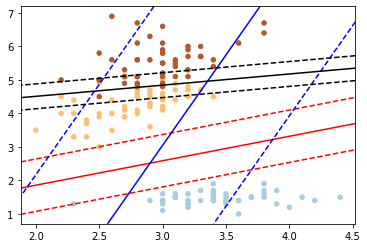

In [130]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap=plt.cm.Paired)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 50)
yy = np.linspace(ylim[0], ylim[1], 50)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clasificador.decision_function(xy)
Z1=Z[:,0].reshape(XX.shape)
Z2=Z[:,1].reshape(XX.shape)
Z3=Z[:,2].reshape(XX.shape)
ax.contour(XX, YY, Z1, colors='r',levels=[-1,0,1], alpha=1,linestyles=['--', '-', '--'])
ax.contour(XX, YY, Z2, colors='b',levels=[-1,0,1], alpha=1,linestyles=['--', '-', '--'])
ax.contour(XX, YY, Z3, colors='k',levels=[-1,0,1], alpha=1,linestyles=['--', '-', '--'])

In [131]:
# Funciones para la mediada del desempeño de los clasificadores
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

resultados=clasificador.predict(X)
print(confusion_matrix(y,resultados))
print(accuracy_score(y,resultados))

[[50  0  0]
 [ 0 49  1]
 [ 0  9 41]]
0.9333333333333333


In [134]:
clasificador.coef_

array([[ 0.93402234, -1.27814159],
       [-1.0544791 ,  0.27296174],
       [-0.62215275,  2.79412069]])

In [136]:
clasificador.intercept_

array([  0.50505926,   2.93415196, -10.26750782])

In [137]:
x1=1.0
x2=0.5
s1=np.sign(0.5050+0.934022*x1-1.2781*x2)
s2=np.sign(2.93415196-1.0544791*x1+0.27296174*x2)
s3=np.sign(-10.26750782-0.62215275*x1+2.79412069*x2)
print([s1,s2,s3])

[1.0, 1.0, -1.0]
